In [2]:

"""
Retail Transaction Dataset Overview

This dataset contains anonymized customer transaction data from a retail business.
Each record represents a single purchase, with details such as customer demographics,
purchase date, product category, discount usage, and payment method.

Key Columns:
- CID: Unique Customer ID
- TID: Unique Transaction ID
- Gender, Age Group: Customer demographics
- Purchase Date: Date and time of purchase
- Product Category: Category of the item bought
- Discount Availed, Discount Name, Discount Amount: Discount details
- Gross Amount, Net Amount: Purchase totals before and after discounts
- Purchase Method: Payment method used
- Location: City where the transaction occurred

Use Cases:
- RFM Segmentation for customer analysis
- Discount effectiveness insights
- Revenue forecasting using time series models
- Demographic-based spending behavior
"""


'\nRetail Transaction Dataset Overview\n\nThis dataset contains anonymized customer transaction data from a retail business.\nEach record represents a single purchase, with details such as customer demographics,\npurchase date, product category, discount usage, and payment method.\n\nKey Columns:\n- CID: Unique Customer ID\n- TID: Unique Transaction ID\n- Gender, Age Group: Customer demographics\n- Purchase Date: Date and time of purchase\n- Product Category: Category of the item bought\n- Discount Availed, Discount Name, Discount Amount: Discount details\n- Gross Amount, Net Amount: Purchase totals before and after discounts\n- Purchase Method: Payment method used\n- Location: City where the transaction occurred\n\nUse Cases:\n- RFM Segmentation for customer analysis\n- Discount effectiveness insights\n- Revenue forecasting using time series models\n- Demographic-based spending behavior\n'

In [3]:
# Import libraries 
import pandas as pd
import plotly.express as px
import numpy as np

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# Read CSV
df = pd.read_csv("C:\\Users\\Rohit\\Downloads\\archive\\ecommerce_data.csv")
df.head(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.30,661.00,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,"4,638.99","4,463.80",Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,"1,986.37","1,774.83",Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,"5,695.61","5,695.61",Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,"2,292.65","1,852.73",Credit Card,Delhi


In [6]:
# Data Exploration
df.isna().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [7]:
df.dtypes

CID                        int64
TID                        int64
Gender                    object
Age Group                 object
Purchase Date             object
Product Category          object
Discount Availed          object
Discount Name             object
Discount Amount (INR)    float64
Gross Amount             float64
Net Amount               float64
Purchase Method           object
Location                  object
dtype: object

In [8]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], dayfirst = True)
df['Discount Availed'] = df['Discount Availed'].map({'Yes':True, 'No':False})
print(f'date:{df['Purchase Date'].dtypes} discount:{df['Discount Availed'].dtypes}')

date:datetime64[ns] discount:bool


In [9]:
df['Discount Name'] = df['Discount Name'].fillna('No Discount')
df.head(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,True,FESTIVE50,64.30,725.30,661.00,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,True,SEASONALOFFER21,175.19,"4,638.99","4,463.80",Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,True,SEASONALOFFER21,211.54,"1,986.37","1,774.83",Credit Card,Delhi
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,False,No Discount,0.00,"5,695.61","5,695.61",Debit Card,Delhi
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,True,WELCOME5,439.92,"2,292.65","1,852.73",Credit Card,Delhi


In [10]:
# Descriptive Statistics
print("Unique Product Categories:", df['Product Category'].nunique())
print("Unique Locations:", df['Location'].nunique())
print("Unique Age Groups:", df['Age Group'].unique())
print("Unique Discount Names:", df['Discount Name'].nunique())
df.describe()

Unique Product Categories: 9
Unique Locations: 14
Unique Age Groups: ['25-45' '60 and above' '18-25' '45-60' 'under 18']
Unique Discount Names: 6


,CID,TID,Purchase Date,Discount Amount (INR),Gross Amount,Net Amount
count,"55,000.00","55,000.00",55000,"55,000.00","55,000.00","55,000.00"
mean,"551,245.59","5,504,740,302.24",2022-03-19 14:27:22.813054464,136.99,"3,012.94","2,875.95"
min,"100,009.00","1,000,163,491.00",2019-09-19 11:46:07,0.00,136.45,-351.12
25%,"323,717.00","3,252,604,264.75",2020-12-17 14:39:50,0.00,"1,562.11","1,429.55"
50%,"550,088.50","5,498,382,536.50",2022-03-17 06:27:07,0.00,"2,954.27","2,814.91"
75%,"776,955.75","7,747,932,761.00",2023-06-21 10:14:07.500000,274.12,"4,342.22","4,211.41"
max,"999,996.00","9,999,392,774.00",2024-09-18 16:00:08,500.00,"8,394.83","8,394.83"
std,"260,603.33","2,594,534,124.48",NaN,165.38,"1,718.43","1,726.13"


In [11]:
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month_name()
df.head(2)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,True,FESTIVE50,64.30,725.30,661.00,Credit Card,Ahmedabad,2023,August
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,True,SEASONALOFFER21,175.19,"4,638.99","4,463.80",Credit Card,Bangalore,2024,February


In [12]:
# Gender Group Distribution
fig1 = px.histogram(df, x='Gender', text_auto=True, title='Gender Distribution')
fig1.show()

In [13]:
# Age Group Distribution
fig2 = px.histogram(df, x='Age Group', text_auto=True, title='Age Distribution')
fig2.show()

In [14]:
# Monthly Revenue Trend

monthly_revenue = df.groupby('Month')['Net Amount'].sum().reset_index()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)

monthly_revenue = monthly_revenue.sort_values(by='Month')

fig3 = px.line(monthly_revenue, x='Month', y='Net Amount', title='Monthly Revenue Trend',markers=True)
fig3.show()


In [15]:
# Revenue by Product Category
category_Rev = df.groupby('Product Category')['Net Amount'].sum().reset_index().sort_values(by='Net Amount',ascending=False)
fig4 = px.bar(category_Rev, x='Product Category', y='Net Amount', title = 'Revenue by Product Category')
fig4.update_traces(texttemplate='%{y}',textposition='outside')
fig4.update_layout(height=600)
fig4.show()

In [16]:
# Revenue by Location
rev_by_loc = df.groupby('Location')['Net Amount'].sum().reset_index().sort_values(by='Net Amount',ascending=False)
fig5 = px.bar(rev_by_loc, x='Location', y='Net Amount', title = 'Revenue by Location')
fig5.update_traces(texttemplate='%{y}',textposition='outside')
fig5.update_layout(height=600)
fig5.show()

In [17]:
# Discount vs No Discount Analysis
discount_count = df['Discount Availed'].value_counts().reset_index()
fig6= px.pie (discount_count, values='count', names='Discount Availed',title='Discount Availed Distribution')
fig6.show()

In [18]:
# Average spend while using discount and whithout discount
discount_avg = df.groupby('Discount Availed')['Net Amount'].mean().reset_index()
fig7 = px.bar(discount_avg, x='Discount Availed', y='Net Amount',color='Discount Availed',
              title='Average Spend: Discount vs No Discount')
fig7.update_traces(texttemplate='%{y}',textposition='outside')
fig7.update_layout(height=600)
fig7.show()

In [19]:
# RFM (Recency, Frequency, Monetary) Segmentation

max_date = df['Purchase Date'].max()

rfm = df.groupby('CID').agg({'Purchase Date' : lambda x : (max_date - x.max()).days,
                             'TID':'count',
                             'Net Amount': 'sum'}
                             ).reset_index()
rfm.columns = ['CID', 'Recency', 'Frequency', 'Monetary']

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)


rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [20]:
fig8 = px.histogram(rfm, x='RFM_Score', nbins=12, title='RFM Score Distribution')
fig8.show()

In [21]:
# Customer Score
def segment_customer(score):
    if score >= 9:
        return 'Champions'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential Loyalist'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

fig9 = px.pie(rfm, names='Segment', title='Customer Segments by RFM Score')
fig9.show()


In [22]:
# Top Discounts
top_discounts = df[df['Discount Availed'] == True].groupby('Discount Name')['Net Amount'].sum().reset_index().sort_values(by='Net Amount', ascending=False)

fig10 = px.bar(top_discounts, x='Discount Name', y='Net Amount', color='Discount Name',
             title='Top Performing Discounts by Net Revenue')
fig10.show()


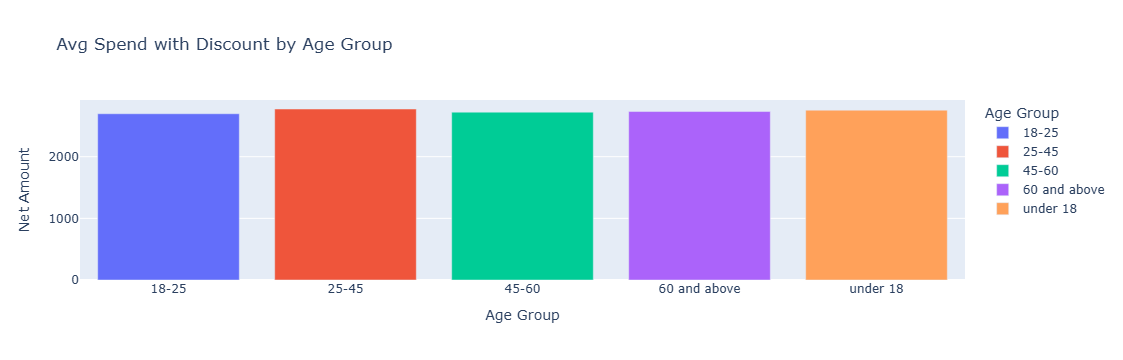

In [23]:
# Discount by Age

age_discount = df[df['Discount Availed']].groupby('Age Group')['Net Amount'].mean().reset_index()

fig = px.bar(age_discount, x='Age Group', y='Net Amount', color='Age Group',
             category_orders={'Age Group': ['18-25', '25-45', '45-60', '60 and above']},
             title='Avg Spend with Discount by Age Group')
fig.show()
